# Neural Network with TensorFlow

## Fashion MNIST
https://keras.io/api/datasets/fashion_mnist/

### Optimizer
* gradient descent
* stochastic gradient descent
* min-batch gradient descent
* momentum
* Nesterov accelerated gradient

In [1]:
import tensorflow as tf 
from tensorflow import keras

import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
# load data
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
# look at one pixel

train_images[0,23,23]

194

In [5]:
# first 10 train labels
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

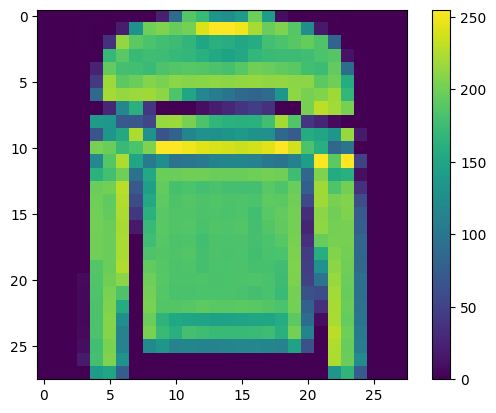

In [7]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

### Data Preprocessing

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### Building the Model
Use a keras sequential model with three different layers.  

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),  # input layer (1)
    keras.layers.Dense(128, activation="relu"),  # input layer (2)
    keras.layers.Dense(10, activation="softmax")  # input layer (3)
])

### Compile Model

In [12]:
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

In [13]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


1875/1875 [==============================] - 5s 2ms/step - loss: 0.4940 - accuracy: 0.8265
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3747 - accuracy: 0.8646
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3346 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3133 - accuracy: 0.8841
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2954 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2823 - accuracy: 0.8947
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2685 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2572 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2461 - accuracy: 0.9088
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2

### Evaluate Model

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3256 - accuracy: 0.8833
Test accuracy: 0.8833000063896179


### Prediction

In [15]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [16]:
predictions.shape

(10000, 10)

In [25]:
print(predictions[0])
print(np.argmax(predictions[0]))

[1.4139954e-06 4.7548281e-07 3.8838490e-08 1.2168934e-10 3.9274951e-08
 7.3623686e-04 3.1858156e-06 4.4289278e-03 4.5393739e-07 9.9482924e-01]
9


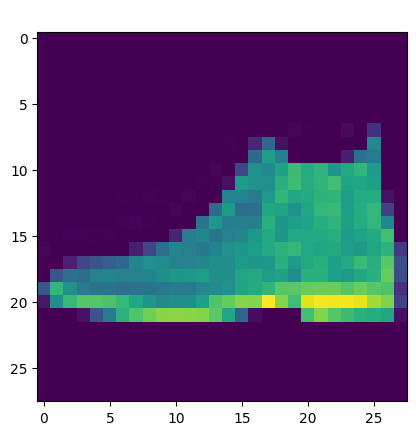

In [57]:
# print(class_names[test_labels[0]], class_names[np.argmax(predictions[0])])
plt.figure()
plt.imshow(test_images[0])
plt.title("boot")
# plt.colorbar()
# plt.grid(False)
plt.show()

### Verifying Predictions

In [32]:
COLOR = "white"
plt.rcParams["text.color"] = COLOR
plt.rcParams["axes.labelcolor"] = COLOR

In [60]:
def predict(model, image, correct_label):
    class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]

    show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
    print(f"expected: {label}", f"Guess: {guess}")
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title(f"expected: {label}")
    plt.xlabel(f"Guess: {guess}")
    plt.colorbar()
    # plt.grid(False)
    plt.show()

def get_number():
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 1000:
                return int(num)
        else:
            print("Try again...")

1/1 [==============================] - 0s 33ms/step
expected: Ankle boot Guess: Ankle boot


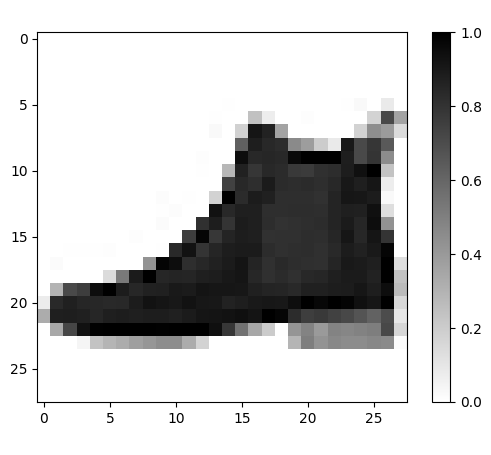

In [62]:
num = get_number()
image = test_images[num]
label = test_labels[num]

predict(model, image, label)